# Multi-class Classification and Neural Networks

In this part, we will implement one-vs-all logistic regression and neural networks to recognize hand-written digits.

# Multi-class Classification

In this part, we will extend the implementation of logistic regression and apply it to one-vs-all classification.

In [407]:
import numpy as np
import pandas as pd
import mat4py as mat
import matplotlib.pyplot as plt
from __future__ import division
from scipy.optimize import minimize

In [35]:
data1 = mat.loadmat("E:\\Machine Learning\\1\\ex3data1.mat")
data1 = pd.DataFrame(data1)
np.shape(data1)

(5000, 2)

In [36]:
data1.head()

,X,y
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]


In [87]:
Y_matrix = np.transpose(np.mat(data1["y"]))
X_matrix = np.transpose(np.mat(data1["X"]))

np.shape(Y_matrix), np.shape(X_matrix), np.shape(X_matrix[0, 0]), type(X_matrix[0, 0])

((5000, 1), (5000, 1), (400,), list)

There are 5000 training examples in the dataset, where each training example is a 20 pixel by 20 pixel image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixel is "unrolled" into a 400-dimensional vector.

Visualizing the data

In [139]:
random_indices = np.random.permutation(np.shape(X_matrix)[0])

X_matrix_plot = X_matrix[random_indices[0:100], 0]
Y_matrix_plot = Y_matrix[random_indices[0:100], 0]

In [154]:
rows = np.shape(X_matrix_plot)[0]
cols = len(X_matrix_plot[0, 0])

example_width = int(cols ** 0.5)
example_height = cols / example_width

display_rows = int(np.floor(rows ** 0.5))
display_cols = int(np.ceil(rows / display_rows))

In [227]:
pad = 1

display_array = -np.ones((pad + display_rows * (example_height + pad), pad + display_cols * (example_width + pad)))

curr_ex = 0
for j in range(0, display_rows, 1):
    for i in range(0, display_cols, 1):
        max_val = max(map(abs, X_matrix_plot[curr_ex, :][0, 0]))
        display_array[pad + j * (example_height + pad): pad + j * (example_height + pad) + example_height, \
            pad + i * (example_width + pad): pad + i * (example_width + pad) + example_width] = \
            np.reshape(X_matrix_plot[curr_ex, :][0, 0], (example_height, example_width)) / max_val
        
        curr_ex = curr_ex + 1

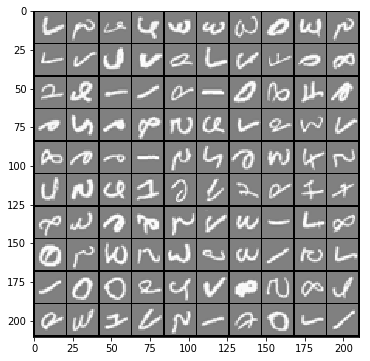

In [249]:
plt.figure(num = 1, figsize = (6, 6))

plt.imshow(display_array, cmap = "gray")

Vectorizing Logistic Regression

We will be using multiple one-vs-all logistic regression models to build a multi-class classifier. Since there are 10 classes, we will need to train 10 separate logistic regression classifiers.

Cost function: J_theta = 1/m * sum(-Y * log(H_x) - (1 - Y) * log(1 - H_x))
H_x = 1 / (1 + exp(-(theta0 * X0 + theta1 * X1 + ... + thetan * Xn)))

Gradient function: G_theta_j = 1/m * sum((H_x - Y) * X_j)

In [374]:
theta_array = np.zeros(len(X_matrix[0, 0]) + 1)

def costGradientFunc(theta_array):
    theta_matrix = np.transpose(np.mat(theta_array))
    m = len(X_matrix)
    J_theta_row = 0
    G_theta = np.zeros(np.shape(theta_matrix)[0])
    
    for i in range(0, m, 1):
        X_matrix_row = np.mat((np.hstack((1, X_matrix[0, 0]))))
        Y_matrix_row = (np.mat(Y_matrix[0, 0]))[0, 0]
        H_x_row = (1 / (1 + np.exp(-X_matrix_row * theta_matrix)))[0, 0]
        J_theta_row = J_theta_row + (-Y_matrix_row * np.log(H_x_row) - (1 - Y_matrix_row) * np.log(1 - H_x_row))
        
        for j in range(0, len(G_theta), 1):
            G_theta[j] = G_theta[j] + (H_x_row - Y_matrix_row) * X_matrix_row[0, j]
        
    
    return J_theta_row / m, G_theta / m

In [376]:
costGradientFunc(theta_array)

(0.6931471805599917,
 array([-9.50000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000

Vectorizing regularized logistic regression

Cost function: 1/m * sum(-Y * log(H_x) - (1 - Y) * log(1 - H_x)) + lambda/2m * sum(theta_j ^ 2) (J > 0)

Gradient function:

G_theta_0 = 1/m * sum(H_x - Y) * X_j,   for j = 0

G_theta_j = 1/m * sum((H_x - Y) * X_j) + lambda/m * theta_j   for j >= 1

In [ ]:
theta_array = np.zeros(len(X_matrix[0, 0]) + 1)

def costGradientFunc(theta_array, lambda1):
    theta_matrix = np.transpose(np.mat(theta_array))
    m = len(X_matrix)
    J_theta_row = 0
    G_theta = np.zeros(np.shape(theta_matrix)[0])
    
    for i in range(0, m, 1):
        X_matrix_row = np.mat((np.hstack((1, X_matrix[0, 0]))))
        Y_matrix_row = (np.mat(Y_matrix[0, 0]))[0, 0]
        H_x_row = (1 / (1 + np.exp(-X_matrix_row * theta_matrix)))[0, 0]
        J_theta_row = J_theta_row + (-Y_matrix_row * np.log(H_x_row) - (1 - Y_matrix_row) * np.log(1 - H_x_row))
        
        for j in range(0, len(G_theta), 1):
            G_theta[j] = G_theta[j] + (H_x_row - Y_matrix_row) * X_matrix_row[0, j]
            
    
    J_theta = J_theta_row / m + lambda1/(2*m) * (sum(theta_array ** 2) - theta_array[0] ** 2) 
    
    for j in range(1, len(G_theta), 1):
        G_theta[j] = G_theta[j] + lambda1/m * (theta_array[j])
        
    
    return J_theta

# Neural Networks

Logistic regression cannot form more complex hypotheses as it is only a linear classifier.

In this part, we will implement a neural network to recognize handwritten digits. The neural network will be able to represent complex models that form non-linear hypotheses.

In [443]:
data2 = mat.loadmat("E:\\Machine Learning\\1\\ex3weights.mat")

theta1_nn_matrix = np.mat(data2["Theta1"])
theta2_nn_matrix = np.mat(data2["Theta2"])

np.shape(theta1_nn_matrix), np.shape(theta2_nn_matrix)

((25, 401), (10, 26))

Feedforward Propagation and Prediction

In [448]:
data1 = mat.loadmat("E:\\Machine Learning\\1\\ex3data1.mat")

In [503]:
one = np.transpose(np.mat(np.ones(len(data1["X"]))))

Y_nn_matrix = np.mat(data1["y"])
X_nn_matrix = np.hstack((one, np.mat(data1["X"])))


np.shape(Y_nn_matrix), np.shape(X_nn_matrix)

((5000, 1), (5000, 401))

In [631]:
def predict(theta1, theta2):
    m = np.shape(X_nn_matrix)[0]
    num_labels = np.shape(theta2)[0]
    
    p = np.zeros(m)
    
    H_x_layer2 = 1 / (1 + np.exp(-X_nn_matrix * np.transpose(theta1)))
    
    one = np.transpose(np.mat(np.ones(m)))
    input_layer2 = np.hstack((one, H_x_layer2))
    
    H_x_layer3 = 1 / (1 + np.exp(-input_layer2 * np.transpose(theta2)))
    
    
    for i in range(0, m, 1):
        list1 = []
        
        for j in range(0, num_labels, 1):
            list1.append(H_x_layer3[i, j])
    
        p[i] = int(list1.index(max(list1)) + 1)
        
    
    return p

In [632]:
pd.Series(predict(theta1_nn_matrix, theta2_nn_matrix)).value_counts()

1.0     507
5.0     506
10.0    505
6.0     504
8.0     502
4.0     499
7.0     496
9.0     496
2.0     494
3.0     491
dtype: int64